In [63]:

import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import shutil
from pathlib import Path
from random import randint


In [64]:

csv_file = "./data/train.csv"  
image_folder = "./data/train_images"
test_image_folder = "./data/test_images"  

data = pd.read_csv(csv_file)

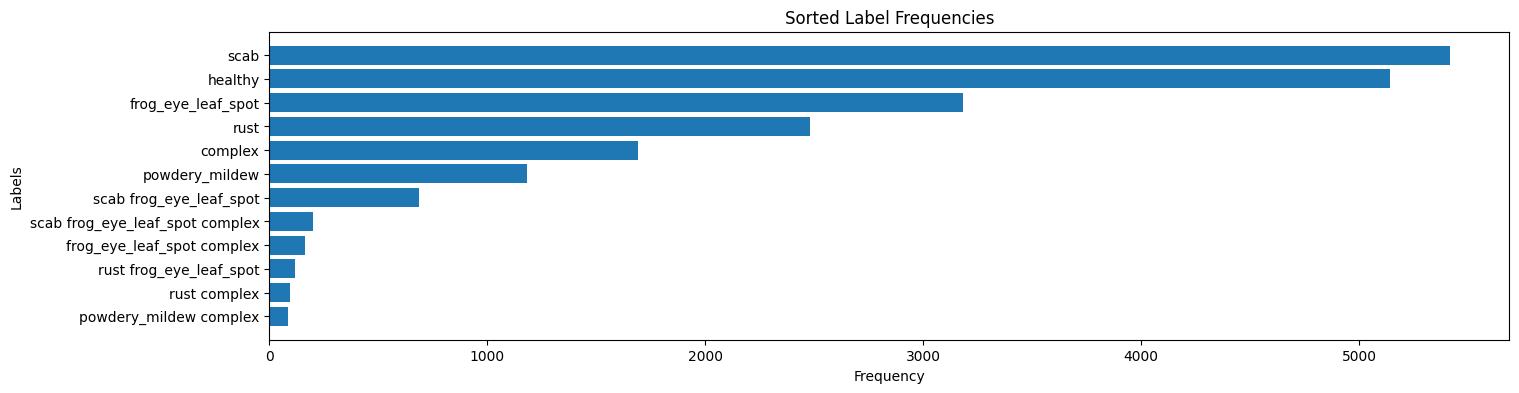

In [65]:

labels = data['labels'].unique()
freqs = [(data['labels'] == label).sum() for label in labels]
sorted_labels_freqs = sorted(zip(labels, freqs), key=lambda x: x[1])

sorted_labels, sorted_freqs = zip(*sorted_labels_freqs)

plt.figure(figsize=(16, 4))
plt.barh(range(len(sorted_labels)), sorted_freqs)
plt.yticks(range(len(sorted_labels)), sorted_labels)
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.title('Sorted Label Frequencies')
plt.show()

In [66]:
labels

array(['scab', 'complex', 'healthy', 'rust',
       'scab frog_eye_leaf_spot complex', 'frog_eye_leaf_spot',
       'powdery_mildew', 'scab frog_eye_leaf_spot',
       'frog_eye_leaf_spot complex', 'rust frog_eye_leaf_spot',
       'powdery_mildew complex', 'rust complex'], dtype=object)

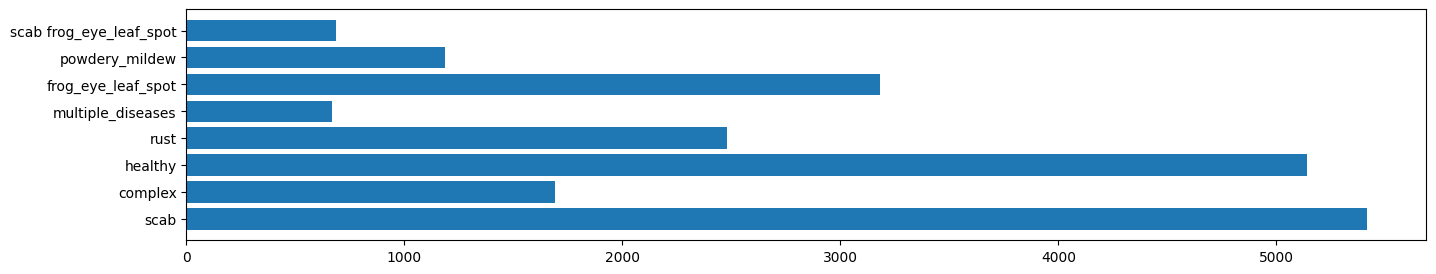

In [67]:
selected_labels = ['scab', 'healthy', 'frog_eye_leaf_spot', 'rust', 'complex',  'powdery_mildew', 'scab frog_eye_leaf_spot']


data['labels'] = data['labels'].map(lambda x: x if x in selected_labels else 'multiple_diseases')
labels = data['labels'].unique()

freqs = [ (data['labels'] == label).sum() for label in labels ]

plt.figure(figsize=(16, 3))
plt.barh(range(len(labels)), freqs)
plt.yticks(range(len(labels)), labels)

plt.show()

In [68]:
df = data

labels = df['labels'].unique()

labels

array(['scab', 'complex', 'healthy', 'rust', 'multiple_diseases',
       'frog_eye_leaf_spot', 'powdery_mildew', 'scab frog_eye_leaf_spot'],
      dtype=object)

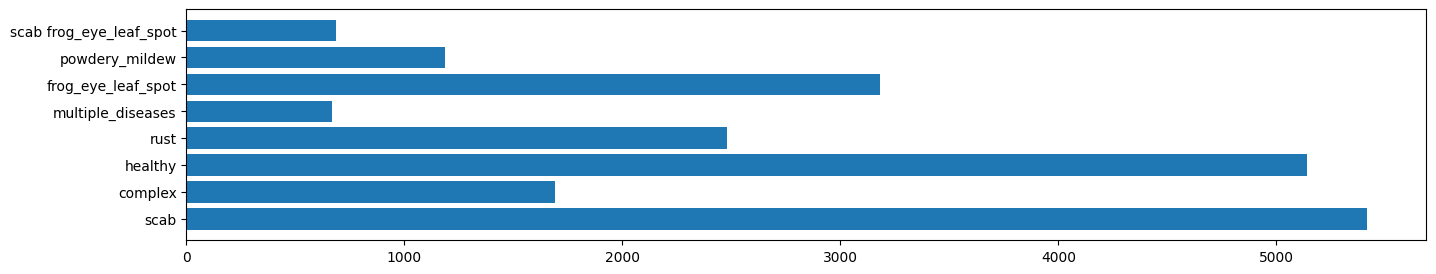

In [69]:
freqs = [ (df['labels'] == label).sum() for label in labels ]

plt.figure(figsize=(16, 3))
plt.barh(range(len(labels)), freqs)
plt.yticks(range(len(labels)), labels)

plt.show()

In [ ]:

reduced_data = pd.DataFrame()

for label in labels:
    samples_per_class = randint(100, 400)  
    subset = data[data['labels'] == label] 
    sampled_subset = subset.sample(n=min(samples_per_class, len(subset)), random_state=42)
    reduced_data = pd.concat([reduced_data, sampled_subset])  

samples_per_class = min((data['labels'] == label).sum() for label in labels)
reduced_data['image_path'] = reduced_data['image'].apply(lambda x: os.path.join(image_folder, x))


In [78]:

test_data = pd.DataFrame()
for label in labels:
    remaining_subset = data[(data['labels'] == label) & (~data.index.isin(reduced_data.index))] 
    sampled_test_subset = remaining_subset.sample(n=5, random_state=42) 
    test_data = pd.concat([test_data, sampled_test_subset]) 

test_data['image_path'] = test_data['image'].apply(lambda x: os.path.join(image_folder, x))


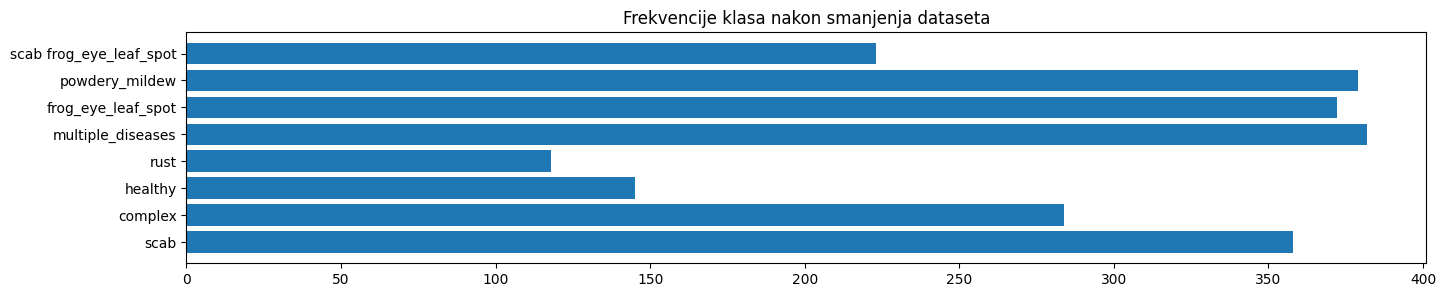

In [71]:
reduced_freqs = [ (reduced_data['labels'] == label).sum() for label in labels ]

plt.figure(figsize=(16, 3))
plt.barh(range(len(labels)), reduced_freqs)
plt.yticks(range(len(labels)), labels)
plt.title("Frekvencije klasa nakon smanjenja dataseta")
plt.show()


In [79]:
test_data.head()

,image,labels,image_path
12155,c77ea3ca12d18bc8.jpg,scab,./data/train_images/c77ea3ca12d18bc8.jpg
14672,d9d0b6b21b1f8496.jpg,scab,./data/train_images/d9d0b6b21b1f8496.jpg
16979,eaa3d0c288c75b4f.jpg,scab,./data/train_images/eaa3d0c288c75b4f.jpg
4439,94e7229aa13f549b.jpg,scab,./data/train_images/94e7229aa13f549b.jpg
8625,b0ad9d89346a697a.jpg,scab,./data/train_images/b0ad9d89346a697a.jpg


In [73]:

# target_folder = 'mydata/test'
def copy_images(data, target_folder):

    for index, row in data.iterrows():

        source_path = row['image_path']  

        target_path = Path(target_folder) / row['labels']  
        target_path.mkdir(parents=True, exist_ok=True)

        try:
            shutil.copy(source_path, target_path / Path(source_path).name)
            print(f"Slika {source_path} je uspešno kopirana u {target_path}")

        except FileNotFoundError:
            print(f"Slika {source_path} nije pronađena i ne može se kopirati.")

In [81]:
copy_images(test_data, 'mydata/test')

Slika ./data/train_images/c77ea3ca12d18bc8.jpg je uspešno kopirana u mydata/test/scab
Slika ./data/train_images/d9d0b6b21b1f8496.jpg je uspešno kopirana u mydata/test/scab
Slika ./data/train_images/eaa3d0c288c75b4f.jpg je uspešno kopirana u mydata/test/scab
Slika ./data/train_images/94e7229aa13f549b.jpg je uspešno kopirana u mydata/test/scab
Slika ./data/train_images/b0ad9d89346a697a.jpg je uspešno kopirana u mydata/test/scab
Slika ./data/train_images/a0f3ba197c2c86ce.jpg je uspešno kopirana u mydata/test/complex
Slika ./data/train_images/cc8f1dd8ea243b0e.jpg je uspešno kopirana u mydata/test/complex
Slika ./data/train_images/f8be9580a45c85e7.jpg je uspešno kopirana u mydata/test/complex
Slika ./data/train_images/8cfcc02dcf278de0.jpg je uspešno kopirana u mydata/test/complex
Slika ./data/train_images/c433bed1642d9de0.jpg je uspešno kopirana u mydata/test/complex
Slika ./data/train_images/Train_366.jpg je uspešno kopirana u mydata/test/healthy
Slika ./data/train_images/cadf5d8d60cb4a88.

In [75]:

train_data, val_data = train_test_split(reduced_data, test_size=0.2, stratify=reduced_data['labels'], random_state=42)


In [76]:

copy_images(train_data, 'mydata/train')

Slika ./data/train_images/b4b5dbd69aa29910.jpg je uspešno kopirana u mydata/train/scab
Slika ./data/train_images/Train_1488.jpg je uspešno kopirana u mydata/train/scab
Slika ./data/train_images/Train_85.jpg je uspešno kopirana u mydata/train/scab
Slika ./data/train_images/c5642ecaef1059cd.jpg je uspešno kopirana u mydata/train/multiple_diseases
Slika ./data/train_images/ad9080dbd20bd9cf.jpg je uspešno kopirana u mydata/train/powdery_mildew
Slika ./data/train_images/f2dc41a1fccb6486.jpg je uspešno kopirana u mydata/train/scab frog_eye_leaf_spot
Slika ./data/train_images/e53b9026b9a29fc1.jpg je uspešno kopirana u mydata/train/frog_eye_leaf_spot
Slika ./data/train_images/Train_79.jpg je uspešno kopirana u mydata/train/scab
Slika ./data/train_images/bcb8c29f156969a2.jpg je uspešno kopirana u mydata/train/multiple_diseases
Slika ./data/train_images/f1a68d7834a33b62.jpg je uspešno kopirana u mydata/train/powdery_mildew
Slika ./data/train_images/dcf0620fdf545a84.jpg je uspešno kopirana u myda

In [77]:
copy_images(val_data, 'mydata/validation')

Slika ./data/train_images/c5e853419f1f606e.jpg je uspešno kopirana u mydata/validation/healthy
Slika ./data/train_images/9b3c78e0c0c7d783.jpg je uspešno kopirana u mydata/validation/frog_eye_leaf_spot
Slika ./data/train_images/a07c8d85566667ab.jpg je uspešno kopirana u mydata/validation/complex
Slika ./data/train_images/dfa33cc760e46268.jpg je uspešno kopirana u mydata/validation/scab
Slika ./data/train_images/Train_1776.jpg je uspešno kopirana u mydata/validation/healthy
Slika ./data/train_images/c09798cb9eb16639.jpg je uspešno kopirana u mydata/validation/multiple_diseases
Slika ./data/train_images/c5a588f9a7b4e50a.jpg je uspešno kopirana u mydata/validation/multiple_diseases
Slika ./data/train_images/f468d79649cd700e.jpg je uspešno kopirana u mydata/validation/frog_eye_leaf_spot
Slika ./data/train_images/e6b330d8994b6c69.jpg je uspešno kopirana u mydata/validation/powdery_mildew
Slika ./data/train_images/c7353ad8437c4953.jpg je uspešno kopirana u mydata/validation/rust
Slika ./data/